In [284]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics as stats

***Question 1***
The file quartet.csv contains four datasets of x and y values, side by side.

(a) Compute the sample mean, sample median, and sample standard deviation for each column of
the dataset.

(b) Based solely upon the summary statistics you computed in part (a), how do the four datasets
compare?

(c) Construct scatterplots for each of the four datasets.

(d) Based solely upon the plots you generated in part (c), how do the four datasets compare?

(e) What’s the moral of the story?

In [285]:
quartet = pd.read_csv("Quartet.csv")
quartet.head(10)

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


In [286]:
quartet.describe()

,x1,y1,x2,y2,x3,y3,x4,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


Without knowing the contents of the graph and only judging from the summary statistics I would wrongly assume that some of the columns actullay had the same data points. 

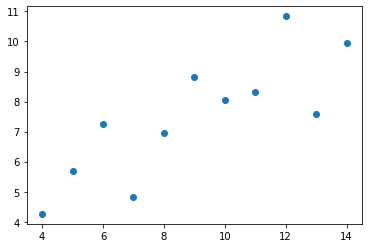

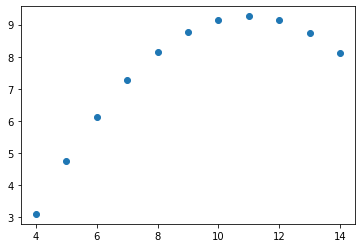

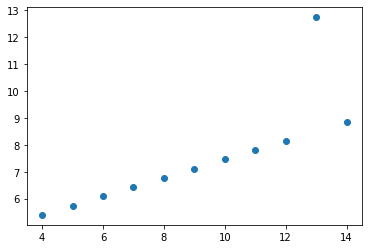

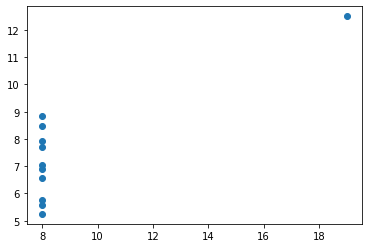

In [287]:
x = quartet['x1']; y = quartet['y1']
plt.scatter(x, y)
plt.show()

x = quartet['x2']; y = quartet['y2']
plt.scatter(x, y)
plt.show()

x = quartet['x3']; y = quartet['y3']
plt.scatter(x, y)

plt.show()

x = quartet['x4']; y = quartet['y4']
plt.scatter(x, y)

plt.show()

Plots one, two, and three are all increasing over time. While plot 4 is an outlier case. It is clear from looking at these 4 graphs that they are all unique data sets

Summary statistics are great but they don't give you the entire picture. For example x1 and x2 look identical according to the stats but are clearly different data sets. In short, summary statistics are great but you still need to visalize and know your data.

***Question 2***

Answer the questions below about the dataset CountyData.csv from the U.S. Census Bureau, performing any data analysis you deem appropriate. The dataset consists of 3143 observations on 53
variables, which are described in the file CountyData Info.pdf.

(a) Provide a histogram of the per-county percentage of residents who speak a foreign language at
home during 2006-2010.

(b) What was the median per-county amount of federal spending in 2009?

(c) Create a scatter plot of the percentage of residents below the poverty level (y-axis) versus the
percentage of the population with a bachelors degree. Comment on what you see.

(d) What fraction of counties have a population whose percentage under the age of 18 is above 30%?

In [288]:
county = pd.read_csv("CountyData.csv")
county.head()

,state,name,FIPS,pop2010,pop2000,age_under_5,age_under_18,age_over_65,female,white,...,women_owned_firms,manufacturer_shipments_2007,mercent_whole_sales_2007,sales,sales_per_capita,accommodation_food_service,building_permits,fed_spending,area,density
0,Alabama,Autauga County,1001,54571,43671.0,6.6,26.8,12.0,51.3,78.5,...,31.7,NaN,NaN,598175.0,12003.0,88157.0,191,331142.0,594.44,91.8
1,Alabama,Baldwin County,1003,182265,140415.0,6.1,23.0,16.8,51.1,85.7,...,27.3,1410273.0,NaN,2966489.0,17166.0,436955.0,696,1119082.0,1589.78,114.6
2,Alabama,Barbour County,1005,27457,29038.0,6.2,21.9,14.2,46.9,48.0,...,27.0,NaN,NaN,188337.0,6334.0,NaN,10,240308.0,884.88,31.0
3,Alabama,Bibb County,1007,22915,20826.0,6.0,22.7,12.7,46.3,75.8,...,NaN,0.0,NaN,124707.0,5804.0,10757.0,8,163201.0,622.58,36.8
4,Alabama,Blount County,1009,57322,51024.0,6.3,24.6,14.7,50.5,92.6,...,23.2,341544.0,NaN,319700.0,5622.0,20941.0,18,294114.0,644.78,88.9


(array([2322.,  457.,  159.,   87.,   56.,   31.,   11.,   10.,    6.,
           4.]),
 array([ 0. ,  9.6, 19.2, 28.8, 38.4, 48. , 57.6, 67.2, 76.8, 86.4, 96. ]),
 <BarContainer object of 10 artists>)

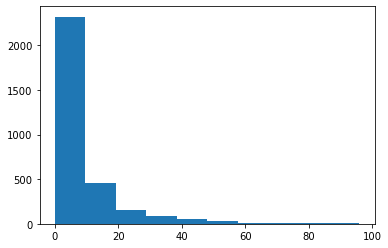

In [289]:
plt.hist(x = county["foreign_spoken_at_home"])

In [290]:
#What was the median per-county amount of federal spending in 2009?

print(f"The median per-county federal spending in 2009 is: {county.fed_spending.median()}")


The median per-county federal spending in 2009 is: 214994.0


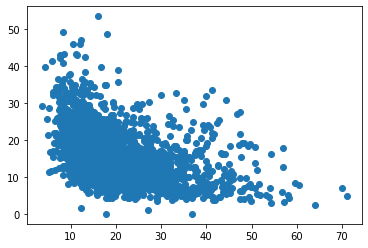

'The percent of resident below the poverty line for any given county has an inverse realtionship with the percent of the popullation with a bachelors degree'

In [291]:
# Create a scatter plot of the percentage of residents below the poverty level (y-axis) versus the
# percentage of the population with a bachelors degree. Comment on what you see.

# plt.title("Poverty versus bachelors degree")
# plt.xlabel("Percent with Bachelors")
# plt.ylabel = ("Percent under poverty line")
plt.scatter(x = county.bachelors , y=county.poverty )
plt.show()

'The percent of resident below the poverty line for any given county has an inverse realtionship with the percent of the popullation with a bachelors degree'

In [292]:
#(d) What fraction of counties have a population whose percentage under the age of 18 is above 30%?
over_18 =len(county.loc[county["age_under_18"]>30])/len(county["age_under_18"])

print(f"The percentange of counties with poppulation of under 18 year olds greater than 30% is {over_18*100:2f}%.")

The percentange of counties with poppulation of under 18 year olds greater than 30% is 3.627108%.


**Question 3** 
You are real estate investor Bernard S. Garrett Sr. and you own a subdivision of 24 houses that
has a mean price of 500,000, a median of 440,000, and a standard deviation of 30,000. A new house
is then built in the subdivision that has a price of 700,000.

(a) What is the new mean house price?

(b) What is the new standard deviation?

(c) Does the median increase, decrease, or stay the same after the new house is built? Or can no
conclusion be made? Explain.

(d) Does the mid-range increase, decrease, or stay the same after the new house is built? Or can no
conclusion be made? Explain.

Why I am assigning this question: This question is assigned to reinforce your knowledge of the
locations of data part we discussed in class.

In [293]:
n = 24 
mean = 500000
median = 440000
std = 30000
old_variance = std**2

new_house = 700000
sum_total = mean*n

new_mean = (sum_total + new_house) / n+1

print(f" a) The new mean is: {new_mean: .2f}")


#old_variance= (sum((x_i-mean)^2)/n-1)
old_sum_squared = old_variance * 23 

new_sum_squared = old_sum_squared + (new_house - new_mean)**2
new_std = (new_sum_squared/n)**.5
print(f" b) The new standard devaition is: {new_std:.2f}.")


 a) The new mean is:  529167.67
 b) The new standard devaition is: 45590.43.


c)
Before there were 24 properties, so the median was evaluated by taking the average of the middle two properties. So, properety number 12 and 
and property number 13 were averaged together. Since there is an even number of properties now only property number 13 will count as the median price. 
Due to the nature of calculating median values we must order the numbers in ascending order. By doing some quick logic we know that 
porperty_12 < property_13 and due to the nature of arithmatic (property_12 + property_13)/2 will always be less than property_13 if and only if 
porperty_12 does not equal property_13. In general it increases but this is not certain.

d) 
mid_range = (max(value) + min(value))/ 2

After looking at the equation for midrange, I believe that the exact nature or value of the midrange can not be determined with the information given. On one hand we know that the new house is much more expansive than the mean value of the houses and much greater than the median vlaue, but this information is not sufficent to derive the midrange nor its properyies pertaining to this set of data.



***Question 4***: The new sample mean and sample variance will be the following: 

The mean will increase proportionally with the constants. 
Original mean is defined as: $$ mean1  = (x_1) + (x_2) + (x_3)... + (x_n)/ n$$
$$ mean2 = (x_1 + c) + (x_2 + c) + (x_3 + c)... + (x_n + c)/ n $$

$$ (x_1) + (x_2) + (x_3)... + (x_n) + (n * c) / n $$

$$mean1 * n = (x_1) + (x_2) + (x_3)... + (x_n) $$

$$mean2 = (mean1 * n) + (n *c) / n $$

$$ mean3 = k(x_1 + c) + k(x_2 + c) + k(x_3 +c)... + k(x_n+c)/ n$$

$$ mean3 = k * mean2$$

$$mean3 = k [ (mean1 * n) + (n *c)] / n $$

$$mean3 = k (mean1 + c) $$

So the new mean is: $$Z_{mean} = k*(X_{mean}+c)$$


The above forumulas show my reasoning for my answer that the new mean will simply be the old mean plus the constant c and then mulitplied by the constant k. 

The variance is defined as $$ \Sigma(x_1 - x_{mean})^2/( n-1) $$

So, $$Z_{i} = X_i - X_{mean}/ S_x$$ So, $$ Z_{mean} = \Sigma_{i=1}^{k}(Z_i)/n$$ So, $$(1/n) * [(X_1 - X_{mean})/S_x + (X_2 - X_{mean})/S_x + (X_3 - X_{mean})/S_x...+(X_k - X_{mean})/S_x]$$ We can now factor out the S_x term. So, $$(1/(S_x * n)) * [(X_1 - X_{mean})/S_x + (X_2 - X_{mean})/S_x + (X_3 - X_{mean})/S_x...+(X_k - X_{mean})/S_x]$$

The new mean $$Z_{mean} = ((n*X_{mean}-X_{mean})/ S_x *n)$$

"Note to grader, I am unsure if I am understanding this question correctly. I am trying to derive a formula for the the mean of the Z data in terms of X but the arithmatic is unruly and bit complex. Perhaps I am overlooking something or simply going about this wrong?"

***Question 5***

You are a recent Cornell graduate and love candles. Unfortunately, all the jobs at Diptyque are taken.
Luckily, you recall your conversation with Professor Pender in office hours and remember that he told
you about Teri Johnson. Teri hires you as a delivery driver for the Harlem Candle Company. It turns
out some luck has found you and all of your packages need to be delivered on one street call Claudette
Colvin St. Each of the k houses’ coordinates are labeled x1, x2, . . . , xk (assume k is odd). Let p be
the coordinate of the place that you decide to park your vehicle. Due to company policy, you must
only deliver each package one by one to avoid confusion. Where do you decide to park your truck
to minimize the cost of walking where the cost is given by the following functions. Please give some
evidence of why your answer is correct. No partial credit.




In order to optamize the cost function for this particular case a few things must be noted first. Let us assume that  Colvin St. can be modeled as a straight road. This allows us to make our analysis in 1-dimension. Hence only requiring us to use the 1-dim distance formula.$$ distance = | (x_i - p) |$$ Now if we want the total distance covered by a delivery driver we must sum these distances i.e $$ \Sigma_{i =1}^{k}| (x_i - p) |$$. 

(a) If the cost function is given by this formula then the ideal place to park would be in the middle of the kth house and the first house. Because there is an odd number of houses the parking location can be derived by this formula: $$(x_{k-1}/2) +1$$. 

(b) If the cost fucntion were given by this equation then the ideal parking location would be: at the begining of the street where p =0. Here the equation $$ \Sigma_{i =1}^{k}| (x_i - p)^2 |$$ Here the equation is optamized where p =0. 

(c) If I am understanding equation correctly then this is simply taking the absoule vlaue of $$|x_i - p|$$ the max value of x will naturally be the house at the end of Colvin St. or $$X_k$$ Then we need to take the minimum of the value of  $$|x_i - p|$$ Here the minimum would be the largest value of p, so the delivery driver would have to park at the last house on Colvin St. 

***Question 6***


Use the following information to answer the following questions. The midterm grades on an ORIE
4130 exam, graded on a scale of 0 to 100, were: 62, 64, 65, 65, 68, 70, 72, 72, 74, 75, 75, 75, 76,78, 78,
81, 83, 83, 84, 85, 87, 88, 92, 95, 98, 98, 100, 100, 740

(a) Do you see any outliers in this data? If so, how would you address the situation?

(b) Construct a stem and leaf plot for this data, using only the values in the range 0–100.

(c) Describe the distribution of exam scores.

a) I see one huge outlier in the data, honestly if i had scored a 740 on my ORIE 4310 midterm I'd be happy but in this case it should be dropped. 

[62, 64, 65, 65, 68, 70, 72, 72, 74, 75, 75, 75, 76, 78, 78, 81, 83, 83, 84, 85, 87, 88, 92, 95, 98, 98, 100, 100]


<StemContainer object of 3 artists>

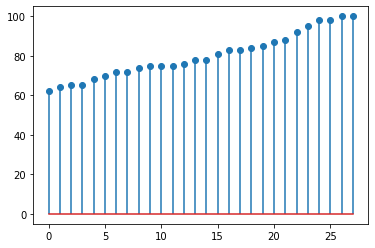

In [294]:
midterm_grades = [62, 64, 65, 65, 68, 70, 72, 72, 74, 75, 75, 75, 76,78, 78, 81, 83, 83, 84, 85, 87, 88, 92, 95, 98, 98, 100, 100, 740]
for grade in midterm_grades:
    if grade > 100:
        midterm_grades.remove(grade)
print(midterm_grades)

stems = [x for x in range(28)]
  
plt.stem(stems, midterm_grades)   # required plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbb30c3550>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbb30c34c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbb30c3a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbb30983d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbb3098ac0>],
 'means': []}

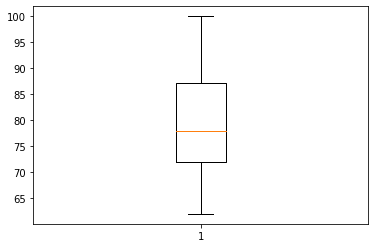

In [295]:
# (B)

plt.boxplot(midterm_grades)

The average exam score is somewhere between 75 and 80. The firat quartile is at around 72 and the third quartile is arounf 87. While the outliers are 100 and about 63. 

***Question 7***
In a statistics class of 30 students at MIT, the mean score on the midterm was 72. In another class of
40 students at Cornell, the mean score was 79. What is the mean score for the two classes combined?

In [296]:
mit_mean = 72 
mit_class = 30
mit_sum = mit_mean * mit_class

cor_mean = 79
cor_class = 40
cor_sum = cor_mean * cor_class


mix_mean = (mit_sum + cor_sum)/ (mit_class +  cor_class)

print(f"The mean for both classes is {mix_mean}")

The mean for both classes is 76.0


***Question 8***
Gladys West owns 23 types of crypto coins. The number of coins of each crypto-currency are as
follows: (2099, 528, 2030, 1350, 1018, 384, 1499, 1265, 375, 424, 789, 810, 522, 513, 488, 200, 215, 486,
257, 557, 260, 461, 500).

(a) Find the mean.

(b) Find the standard deviation.

(c) Find the median.

(d) Find the mid-range and range.

(e) Construct a dot-plot.

(f) Construct a box-plot.

(g) Which points if any are outliers?

(h) If a histogram were made of this data, would it be symmetric, left skewed, or right skewed?

(i) Who is Gladys West and why should you know her?

In [297]:
coins = [2099, 528, 2030, 1350, 1018, 384, 1499, 1265, 375, 424, 789, 810, 522, 513,\
         488, 200, 215, 486, 257, 557, 260, 461, 500]
print(f"The mean value of his crypot is {sum(coins)/len(coins):.2f}")
print(f"The standard deviation is {stats.stdev(coins):.2f}")
print(f"The median is {stats.median(coins):.2f}")
print(f"The mid-range is {(max(coins)-min(coins))/2:.2f}")
print(f"The range is {(max(coins)-min(coins)):.2f}")

The mean value of his crypot is 740.43
The standard deviation is 549.84
The median is 513.00
The mid-range is 949.50
The range is 1899.00


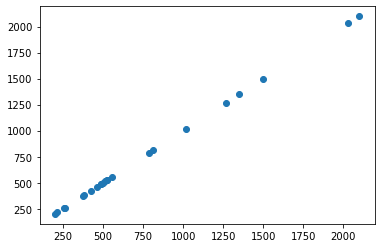

In [298]:
plt.scatter(x = coins, y = [2099, 528, 2030, 1350, 1018, 384, 1499, 1265, 375, 424, 789, 810, 522, 513,\
         488, 200, 215, 486, 257, 557, 260, 461, 500])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1fbb2ed7100>,
 'caps': [<matplotlib.lines.Line2D at 0x1fbb2ed7a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fbb2ed7f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1fbad7aeeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fbb2ec27c0>],
 'means': []}

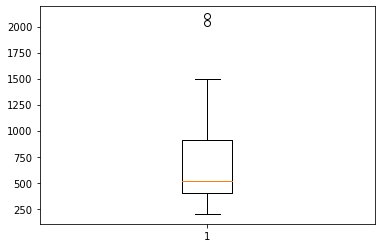

In [299]:
plt.boxplot(coins)

(array([6., 9., 0., 2., 1., 1., 2., 0., 0., 2.]),
 array([ 200. ,  389.9,  579.8,  769.7,  959.6, 1149.5, 1339.4, 1529.3,
        1719.2, 1909.1, 2099. ]),
 <BarContainer object of 10 artists>)

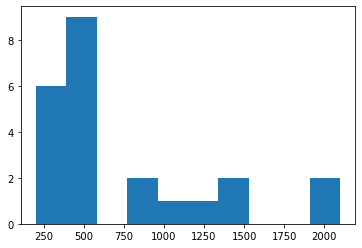

In [300]:
plt.hist(x = coins)

g) Although in this data set the outliers are much less egregious, points 2099 and 1499 are much higher than the other data points.

h) After creating a quick histogram of the provided data, one can make an arguement that the data is left skewed. At a glance this can be explained by the number of crypto currenices which are on the lower end of the price list. 

i) Gladys West a mathematician and scholar. Her contribution to her field helped contribute to the invention of the GPS.

***Question 9*** Who is John Wilder Tukey? Why did he choose 1.5 for the interquartile range for outliers? What
other important contributions did he make?

John Tukey was the inventor of the boxplot. He was a working statitician and created the box plot in order to help with data analysis. He chose 1.5 for the interquartile range for outliers through trail and error. He believed that 1 interquartile range was too small becasue it only encompassed 1 standard devaition of data while 2 was too large since it encompassed 2 standard devaitions. He is also responsible for the creation of the Fast Fourier Transform algorithm (which I recall using in a physics class on waves).